5. Gaussian filtering:

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [8]:
def get_gaussian_kernel(size, sigma):
    """
    Generates a normalized 2D Gaussian kernel manually using NumPy.
    """
    # 1. Create coordinate grid centered at (0,0)
    # For size=5, range is -2 to +2
    k = size // 2
    x, y = np.meshgrid(np.arange(-k, k+1), np.arange(-k, k+1))
    
    # 2. Apply Gaussian Formula: G(x,y) = exp(-(x^2 + y^2) / (2*sigma^2))
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # 3. Normalize so the sum of the kernel is 1 (preserves brightness)
    kernel = kernel / np.sum(kernel)
    
    return kernel, x, y

In [9]:
filename = 'runway.png'  
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

(a) Using NumPy, compute a normalized 5×5 Gaussian kernel for σ=2.

In [10]:
sigma = 2
kernel_5x5, _, _ = get_gaussian_kernel(size=5, sigma=sigma)

print("\n--- Part (a): 5x5 Normalized Gaussian Kernel Values ---")
print(np.round(kernel_5x5, 4)) 


--- Part (a): 5x5 Normalized Gaussian Kernel Values ---
[[0.0232 0.0338 0.0383 0.0338 0.0232]
 [0.0338 0.0492 0.0558 0.0492 0.0338]
 [0.0383 0.0558 0.0632 0.0558 0.0383]
 [0.0338 0.0492 0.0558 0.0492 0.0338]
 [0.0232 0.0338 0.0383 0.0338 0.0232]]


(b) Visualize a 51×51 computed Gaussian kernel as a 3D surface plot, where the kernel
coefficients represent the height.

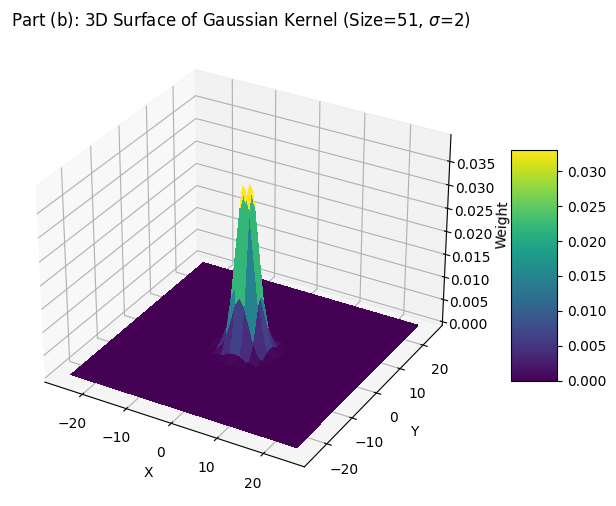

In [11]:
kernel_51, X, Y = get_gaussian_kernel(size=51, sigma=sigma)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, kernel_51, cmap='viridis', linewidth=0, antialiased=False)

ax.set_title(f'Part (b): 3D Surface of Gaussian Kernel (Size=51, $\sigma$={sigma})')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Weight')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


(c) Apply Gaussian smoothing to a given grayscale image using the manually computed
Gaussian kernel.

In [12]:
manual_blur = cv2.filter2D(image, -1, kernel_5x5)

(d) Do the same using OpenCV’s built-in cv.GaussianBlur() function.

In [13]:
opencv_blur = cv2.GaussianBlur(image, (5, 5), sigmaX=sigma)

VISUAL COMPARISON

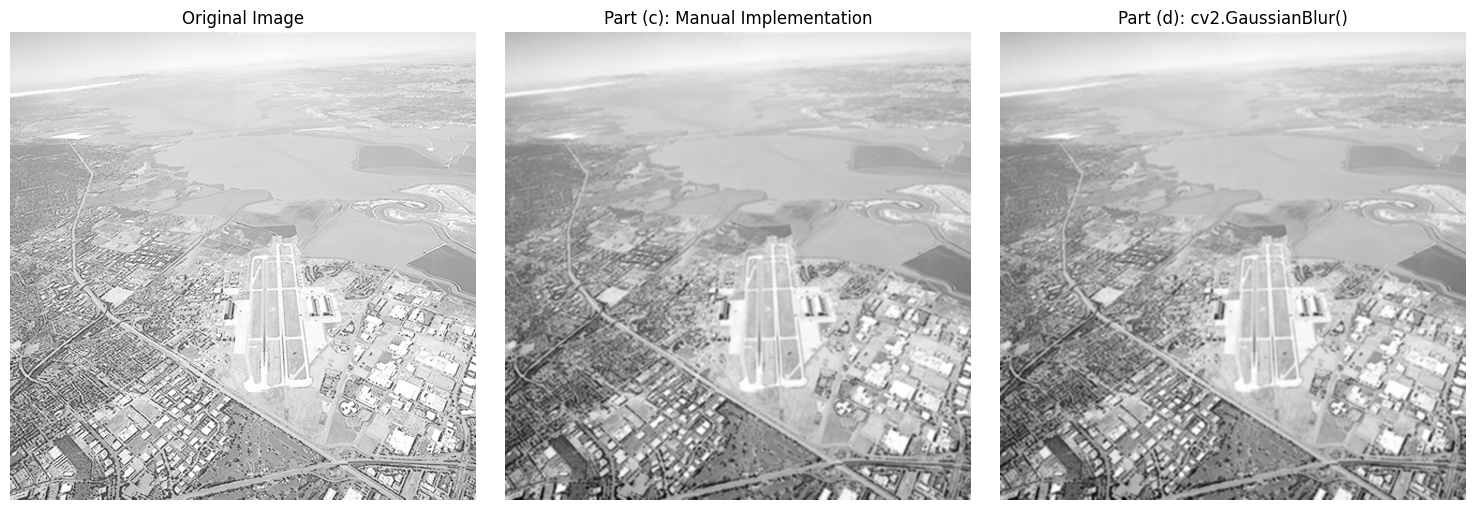


Max pixel difference between Manual and OpenCV result: 1.0


In [18]:
plt.figure(figsize=(15, 5))

# Original
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Manual Result
plt.subplot(1, 3, 2)
plt.imshow(manual_blur, cmap='gray')
plt.title('Part (c): Manual Implementation')
plt.axis('off')

# OpenCV Result
plt.subplot(1, 3, 3)
plt.imshow(opencv_blur, cmap='gray')
plt.title('Part (d): cv2.GaussianBlur()')
plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: Verify results are similar
diff = np.abs(manual_blur.astype(float) - opencv_blur.astype(float))
print(f"\nMax pixel difference between Manual and OpenCV result: {np.max(diff)}")